## Visualization and Analysis
In this notebook, we will visualize and analyze our data we obtained from running AWS Rekognition.

We first import necessary libraries for visualization.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Because we already have uploaded our csv file to S3 with public access, we can simply read it by calling its url.
We also rename our column names so that they are more intuitive.

In [ ]:
df = pd.read_csv('https://qtm350-fp.s3.amazonaws.com/csv/detect_ppe_output.csv')
df.rename(columns={"img":"Image", "bodyPartName":"Body_Part_Name", "bodyPartConf":"Body_Part_Confidence_Score","eq_type":"PPE_Type","eq_conf":"PPE_Confidence_Score","eqCover_conf":"PPE_Cover_Confidence_Score","eq_box":"PPE_Bounding_Box_Area","eqCover_bool":"PPE_Covers"}, inplace = True)

df

,Image,Body_Part_Name,Body_Part_Confidence_Score,PPE_Type,PPE_Confidence_Score,PPE_Cover_Confidence_Score,PPE_Bounding_Box_Area,PPE_Covers
0,image-asset/1684177591-huge.jpg,FACE,99.458809,FACE_COVER,99.934128,90.723564,0.019554,True
1,image-asset/1684177591-huge.jpg,HEAD,99.969254,HEAD_COVER,68.631821,95.665405,0.039268,True
2,image-asset/1684177591-huge.jpg,FACE,96.018814,FACE_COVER,99.720436,89.325356,0.009923,True
3,image-asset/1684177591-huge.jpg,HEAD,99.608627,HEAD_COVER,95.798180,98.066414,0.051126,True
4,image-asset/1684177591-huge.jpg,FACE,94.266830,FACE_COVER,99.801407,96.197754,0.010404,True
...,...,...,...,...,...,...,...,...
120,image-asset/taken/IMG_8072.JPG,FACE,99.981300,FACE_COVER,95.747658,99.999992,0.012923,False
121,image-asset/taken/IMG_8073.JPG,HEAD,92.567757,HEAD_COVER,54.348499,100.000000,0.012487,False
122,image-asset/taken/IMG_8073.JPG,HEAD,98.892235,HEAD_COVER,61.682014,99.991692,0.001323,True
123,image-asset/taken/IMG_8074.JPG,FACE,99.362358,FACE_COVER,91.241142,53.143822,0.013208,True


This dataframe has a dedicated row to each detected instance of a visible body part found across all the photos in the dataset. The columns contain:

*   image file name
*   the body part detected and the respective confidence score
*   the PPE detected and and the respective confidence score
*   the confidence score for whether the PPE covers up the respective body part
*   item the bounding box area
*   whether the PPE covers or not



Let's first take a look at the frequency of each body part detected in our dataset.

Text(0.5, 1.0, 'Number of Each Body Part Detected')

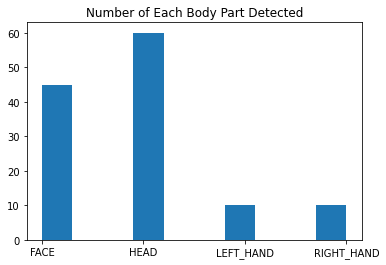

In [ ]:
plt.hist(df['Body_Part_Name'])
plt.xlabel('')
plt.ylabel('')
plt.title('Number of Each Body Part Detected')

We can see that head most frequently appears across the photos. It appears more often than face because the head has to always be present in the image when faces are visible. An equal number of left and right hands have been detected also likely in images where most of the body is clearly depicted.

Now we visualize the frequency of each PPE detected in our dataset.

Text(0.5, 1.0, 'Number of Each PPE Detected')

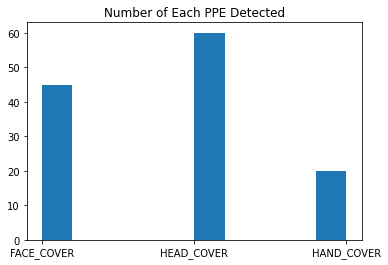

In [ ]:
plt.hist(df['PPE_Type'])
plt.xlabel('')
plt.ylabel('')
plt.title('Number of Each PPE Detected')

This histogram shows that `HEAD_COVER` is most frequent, which makes sense because we also had highest frequency for `HEAD`. This is to be expected since they are an essential PPE required to be worn at construction sights. There is nearly just as many face covers detected, this large quantity could be partially attributed to face masks being worn due to COVID-19. Hand covers are the least frequently detected PPE likely since it is only needed when performing certain tasks and is therefore not required by all the workers.

Now we plot the confidence score of `PPE_Cover_Confidence_Score`.

Text(0.5, 1.0, 'PPE Cover Confidence Score Quantity Breakdown')

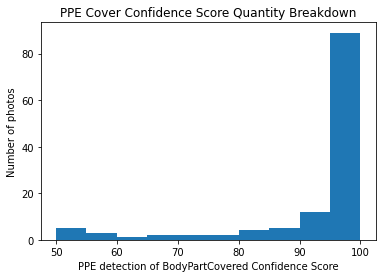

In [ ]:
plt.hist(df['PPE_Cover_Confidence_Score'])
plt.xlabel('PPE detection of BodyPartCovered Confidence Score')
plt.ylabel('Number of photos')
plt.title('PPE Cover Confidence Score Quantity Breakdown')

From this histogram, we can see that most of our confidence score range from 95 to 100.

Now we will create a dataframe that have the `PPE_Cover_Confidence_Score` over 99.

Text(0.5, 1.0, '                             Distribution of PPE detection of BodyPartCovered Confidence Score (> 99)')

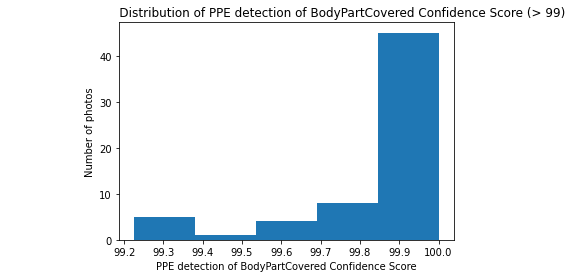

In [ ]:
df_high_conf = df[df['PPE_Cover_Confidence_Score'] > 99]

plt.hist(df_high_conf['PPE_Cover_Confidence_Score'], bins = 5)
plt.xlabel('PPE detection of BodyPartCovered Confidence Score')
plt.ylabel('Number of photos')
plt.title('                             Distribution of PPE detection of BodyPartCovered Confidence Score (> 99)')

This histogram shows the frequency of the confidence score above 99% corresponding to PPE cover detected in the images from our dataset. When we focused on the top 99%, we can see most results return over 99.8% confidence.

Now we will create a scatterplot that shows the change in BodyPartCovered Confidence Score as the bounding box area increases.

Text(0.5, 1.0, 'Bounding Box Area by BodyPartCovered Confidence Score')

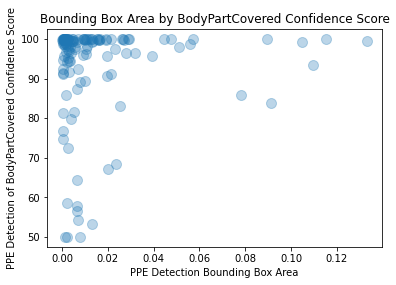

In [ ]:
plt.plot(df['PPE_Bounding_Box_Area'], df['PPE_Cover_Confidence_Score'], 'o', alpha=0.3, markersize=10)
plt.xlabel('PPE Detection Bounding Box Area')
plt.ylabel('PPE Detection of BodyPartCovered Confidence Score')
plt.title('Bounding Box Area by BodyPartCovered Confidence Score')

We can see from this scatterplot that lots of clusters in the area where confidence score is high and the box area is small. When focusing on the data points outside the cluster, we can see that low confidence scores tend to be correlated with small bounding boxes, impying that the people depicted in the images are far away. Large bounding boxes on the otherhand tend to have high confidence scores since the people are standing closer and therefore they are more clearly depicted in the image.

Text(0.5, 1.0, 'BodyPartCovered Confidence Score per PPE Category')

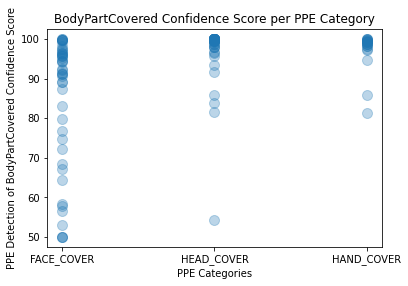

In [ ]:
plt.plot(df['PPE_Type'], df['PPE_Cover_Confidence_Score'], 'o', alpha=0.3, markersize=10)
plt.xlabel('PPE Categories')
plt.ylabel('PPE Detection of BodyPartCovered Confidence Score')
plt.title('BodyPartCovered Confidence Score per PPE Category')

This scatterplot shows the distribution of confidence scores for each category of PPE. We can see that face covers have the largest range of confidence scores.

Text(0.5, 1.0, '               Bounding Box Area by BodyPartCovered Confidence Score (> 99)')

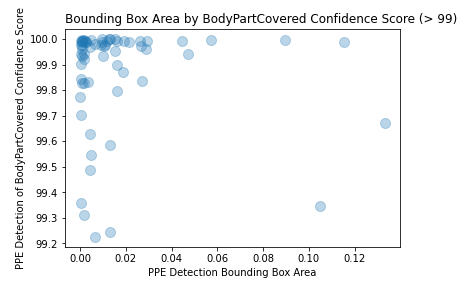

In [ ]:
plt.plot(df_high_conf['PPE_Bounding_Box_Area'], df_high_conf['PPE_Cover_Confidence_Score'], 'o', alpha=0.3, markersize=10)
plt.xlabel('PPE Detection Bounding Box Area')
plt.ylabel('PPE Detection of BodyPartCovered Confidence Score')
plt.title('               Bounding Box Area by BodyPartCovered Confidence Score (> 99)')

This scatterplot focused on confidence scores above 99% shows a similar trend to the overall scatterplot. We see a cluster around where confidence score is high and the box area is small. Lower confidence scores tend to be correlated with small bounding boxes and large bounding boxes tend to have high confidence scores.

In [ ]:
df_high_conf.corr()

,Body_Part_Confidence_Score,PPE_Confidence_Score,PPE_Cover_Confidence_Score,PPE_Bounding_Box_Area,PPE_Covers
Body_Part_Confidence_Score,1.000000,-0.039598,0.235258,0.197130,-0.065845
PPE_Confidence_Score,-0.039598,1.000000,0.011052,-0.048928,-0.097706
PPE_Cover_Confidence_Score,0.235258,0.011052,1.000000,-0.065027,0.001254
PPE_Bounding_Box_Area,0.197130,-0.048928,-0.065027,1.000000,0.036069
PPE_Covers,-0.065845,-0.097706,0.001254,0.036069,1.000000


In [ ]:
df.corr()

,Body_Part_Confidence_Score,PPE_Confidence_Score,PPE_Cover_Confidence_Score,PPE_Bounding_Box_Area,PPE_Covers
Body_Part_Confidence_Score,1.000000,0.029311,0.040525,0.216066,-0.035777
PPE_Confidence_Score,0.029311,1.000000,-0.236191,-0.126924,-0.064876
PPE_Cover_Confidence_Score,0.040525,-0.236191,1.000000,0.087499,0.149552
PPE_Bounding_Box_Area,0.216066,-0.126924,0.087499,1.000000,0.058536
PPE_Covers,-0.035777,-0.064876,0.149552,0.058536,1.000000


Both of these dataframes show the correlation between the variables:

*   Body_Part_Confidence_Score	
*   PPE_Confidence_Score
*   PPE_Cover_Confidence_Score	
*   PPE_Bounding_Box_Area
*   PPE_Covers

The first dataframe is for confidence scores over 99%.

The second dataframe is for all confidence scores.

In [ ]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
results = smf.ols('PPE_Cover_Confidence_Score ~ PPE_Bounding_Box_Area', data=df).fit()
results.params

Intercept                92.424816
PPE_Bounding_Box_Area    44.359449
dtype: float64

These are the OLS regression results, the intercept of the best fit line is 92.424816 and the slope is 44.359449.

Text(0.5, 1.0, '                             Bounding Box Area by BodyPartCovered Confidence Score (w/ Regression)')

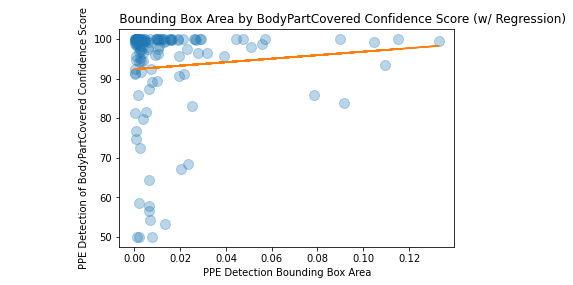

In [ ]:
plt.plot(df['PPE_Bounding_Box_Area'], df['PPE_Cover_Confidence_Score'], 'o', alpha=0.3, markersize=10)
plt.plot(df['PPE_Bounding_Box_Area'], results.predict(df['PPE_Bounding_Box_Area']))
plt.xlabel('PPE Detection Bounding Box Area')
plt.ylabel('PPE Detection of BodyPartCovered Confidence Score')
plt.title('                             Bounding Box Area by BodyPartCovered Confidence Score (w/ Regression)')

This scatterplot shows the change in BodyPartCovered Confidence Score as the bounding box area increases with the best fit line. There is a positive relationship between bounding box size and PPE confidence score. This would make sense since, as stated, a larger bounding box around PPE means the PPE appears closer in the image, and is therefore clearer to see and easier to accurately assess.

In [ ]:
results_over_99 = smf.ols('PPE_Cover_Confidence_Score ~ PPE_Bounding_Box_Area', data=df_high_conf).fit()
results_over_99.params

Intercept                99.876274
PPE_Bounding_Box_Area    -0.486152
dtype: float64

These are the OLS regression results for all confidence scores above 99%, the intercept of the best fit line is 99.876274 and the slope is -0.486152.

Text(0.5, 1.0, '                             Bounding Box Area by BodyPartCovered Confidence Score (w/ Regression)')

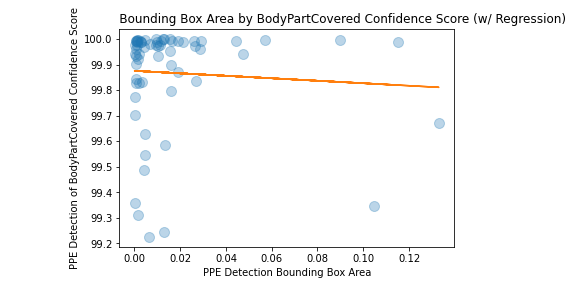

In [ ]:
plt.plot(df_high_conf['PPE_Bounding_Box_Area'], df_high_conf['PPE_Cover_Confidence_Score'], 'o', alpha=0.3, markersize=10)
plt.plot(df_high_conf['PPE_Bounding_Box_Area'], results_over_99.predict(df_high_conf['PPE_Bounding_Box_Area']))
plt.xlabel('PPE Detection Bounding Box Area')
plt.ylabel('PPE Detection of BodyPartCovered Confidence Score')
plt.title('                             Bounding Box Area by BodyPartCovered Confidence Score (w/ Regression)')

This scatterplot shows the change in BodyPartCovered Confidence Score above 99% as the bounding box area increases with the best fit line. There now happens to be a negative relationship when we focus on just the datapoints that had above 99% confidence, which is likely because we are focused on the instances where AWS Rekognition is already so confident that the PPE is covering that the relationship would be nearly be linea, or slightly negative in our case.